## Observations and Insights 
Obersrvations
1. According to our data, weight and tumor volume does not have an inverted relationshp.
2. According to our data, out of all the drugs tested; Capomulin and Ramicane are the most effective drugs.
3. Lastly, the more time Capomulin is treated the lower the average tumor volume.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
data_df = pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')
# Display the data table for preview
data_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
mice = data_df['Mouse ID'].value_counts()
number_of_mice = len(mice)
number_of_mice

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mice = data_df.loc[data_df.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
all_duplicate_mouse_id=pd.DataFrame(duplicate_mice)
all_duplicate_mouse_id


,0
0,g989


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = data_df[data_df['Mouse ID'].isin(duplicate_mice)==False]

In [6]:
# Checking the number of mice in the clean DataFrame.
clean_mice=clean_df["Mouse ID"].value_counts()
clean_number_of_mice=len(clean_mice)
clean_number_of_mice

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Group data by Drug Regimen
summary_df = clean_df.groupby('Drug Regimen')

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
tumor_mean = summary_df['Tumor Volume (mm3)'].mean()
tumor_median = summary_df['Tumor Volume (mm3)'].median()
tumor_stdev = summary_df['Tumor Volume (mm3)'].std()
tumor_sem = summary_df['Tumor Volume (mm3)'].sem()

# Create DataFrame to summarize calculations
summary_grouped_df = pd.DataFrame({'Mean': tumor_mean, 'Median': tumor_median,
                                   'Standard Deviation': tumor_stdev, 'SEM': tumor_sem})

summary_grouped_df.head()


,Mean,Median,Standard Deviation,SEM
Drug Regimen,,,,
Capomulin,40.675741,41.557809,4.994774,0.329346
Ceftamin,52.591172,51.776157,6.268188,0.469821
Infubinol,52.884795,51.820584,6.567243,0.492236
Ketapril,55.235638,53.698743,8.279709,0.603860
Naftisol,54.331565,52.509285,8.134708,0.596466


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
regimen_mean = clean_df.groupby('Drug Regimen').mean()["Tumor Volume (mm3)"]
regimen_mean


regimen_median = clean_df.groupby('Drug Regimen').median()["Tumor Volume (mm3)"]
regimen_median


regimen_variance = clean_df.groupby('Drug Regimen').var()["Tumor Volume (mm3)"]
regimen_variance


regimen_std = clean_df.groupby('Drug Regimen').std()["Tumor Volume (mm3)"]
regimen_std

regimen_sem = clean_df.groupby('Drug Regimen').sem()["Tumor Volume (mm3)"]
regimen_sem


Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.544332
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

## Bar and Pie Charts

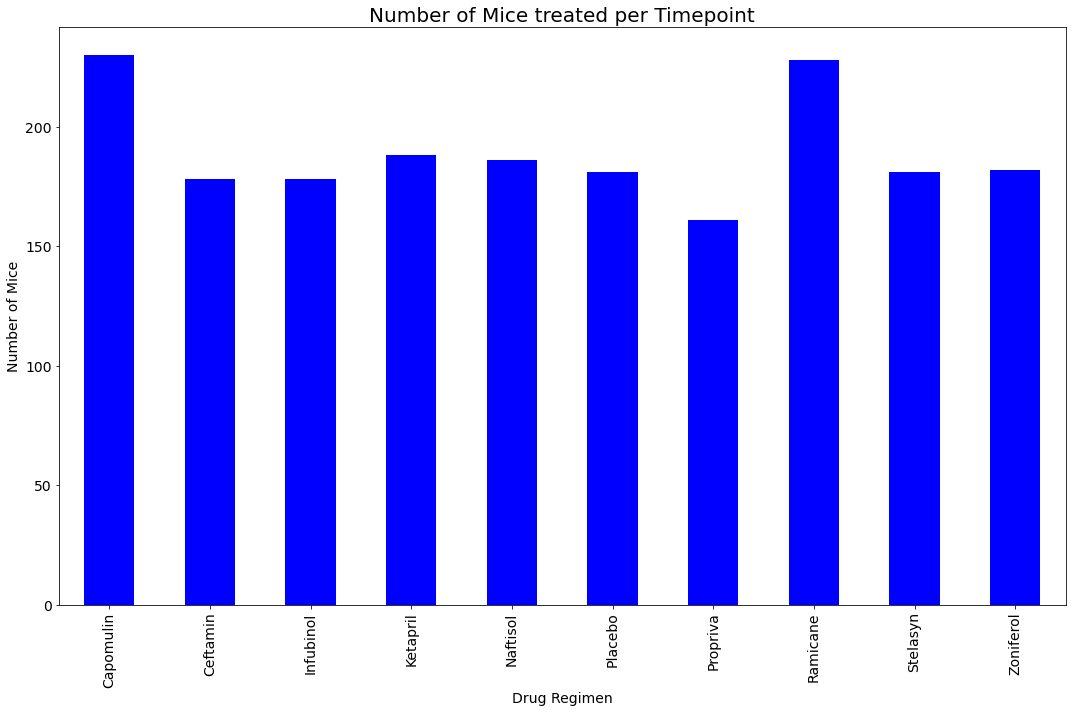

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     161
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
count_mice_per_tret = data_df.groupby(["Drug Regimen"]).count()["Mouse ID"] 


plot_pandas = count_mice_per_tret.plot.bar(figsize=(15,10), color='b',fontsize = 14)
count_mice_per_tret
plt.xlabel("Drug Regimen",fontsize = 14)
plt.ylabel("Number of Mice",fontsize = 14)
plt.title("Number of Mice treated per Timepoint",fontsize = 20)

plt.savefig("../Images/Pan_mice_per_treat.png", bbox_inches = "tight")
plt.tight_layout()
plt.show()

count_mice_per_tret



In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

mice_list =(data_df.groupby(["Drug Regimen"])["Mouse ID"].count()).tolist()
mice_list

[230, 178, 178, 188, 186, 181, 161, 228, 181, 182]

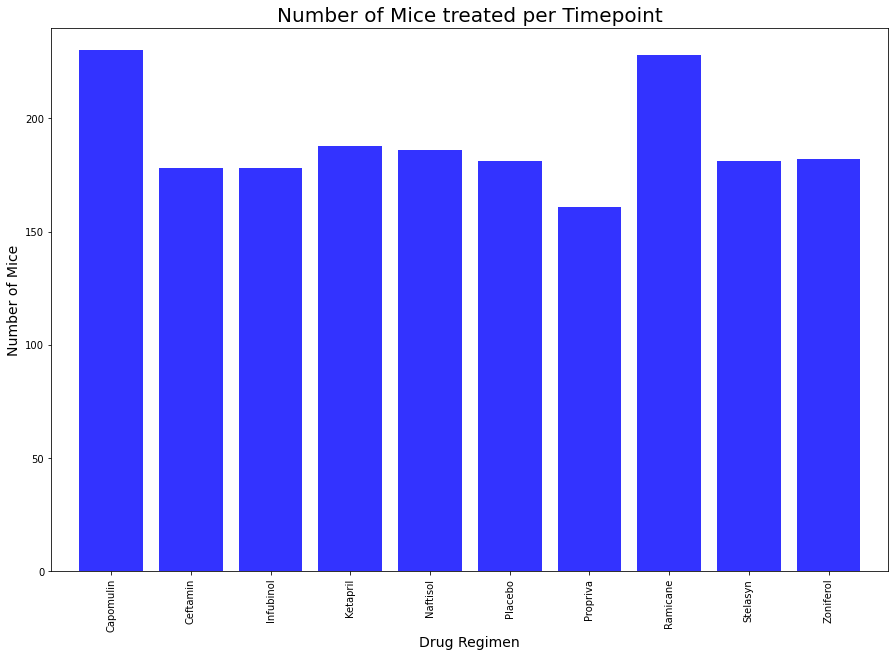

In [11]:
x_axis = np.arange(len(count_mice_per_tret))
fig1, ax1 = plt.subplots(figsize=(15, 10))
plt.bar(x_axis, mice_list, color='b', alpha=0.8, align='center')

tick_locations = [value for value in x_axis]

plt.xticks(tick_locations, ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],  rotation='vertical')

plt.xlim(-0.75, len(x_axis)-0.25)

plt.ylim(0, max(mice_list)+10)

plt.title("Number of Mice treated per Timepoint",fontsize = 20)
plt.xlabel("Drug Regimen",fontsize = 14)
plt.ylabel("Number of Mice",fontsize = 14)

plt.savefig("../Images/mat_mice_per_treat.png", bbox_inches = "tight")

Text(0, 0.5, '')

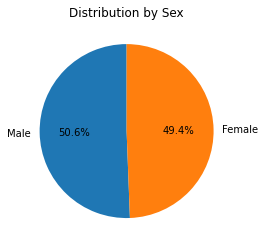

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# Identify distribution of data by sex
data = data_df['Sex'].value_counts()

# Plot a pie chart filled with corresponding percentages and displayed vertically
pie_plot = data.plot.pie(autopct="%1.1f%%", startangle=90, title='Distribution by Sex')

# Hide the 'y' label
pie_plot.set_ylabel('')


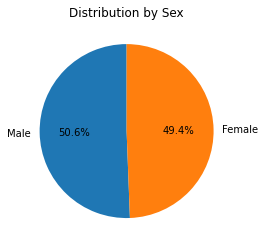

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Identify distribution of data by sex
data = data_df['Sex'].value_counts()

# Tell matplotlib to create a pie chart filled with corresponding percentages and displayed vertically
plt.pie(data, labels=data.index.values, autopct="%1.1f%%", startangle=90)
plt.title('Distribution by Sex')

# Display resulting plot
plt.show()


## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_tp_df = pd.DataFrame(data_df.groupby('Mouse ID')['Timepoint'].max().sort_values()).reset_index().rename(columns={'Timepoint': 'max_timepoint'})
max_tp_df

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_df = pd.merge(data_df, max_tp_df, on='Mouse ID')
merged_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,max_timepoint
0,k403,Ramicane,Male,21,16,0,45.000000,0,45
1,k403,Ramicane,Male,21,16,5,38.825898,0,45
2,k403,Ramicane,Male,21,16,10,35.014271,1,45
3,k403,Ramicane,Male,21,16,15,34.223992,1,45
4,k403,Ramicane,Male,21,16,20,32.997729,1,45


In [15]:
# Put treatments into a list for for loop (and later for plot labels)

drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)

drug_values = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.


# Locate the rows which contain mice on each drug and get the tumor volumes
    
for drug in drugs:
    temp_df = merged_df.loc[merged_df['Drug Regimen'] == drug]

# add subset 
    final_volume_df = temp_df.loc[temp_df['Timepoint'] == temp_df['max_timepoint']]
    
# Determine outliers using upper and lower bounds
    values = final_volume_df['Tumor Volume (mm3)']
    drug_values.append(values)
    
 # Calculate and print the interquartile range (IQR) for each regimen
    quartiles = values.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    print(f'IQR for {drug}: {iqr}')
    
# Find upper and lower bounds to help identify outliers for each regimen
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f'Lower Bound for {drug}: {lower_bound}')
    print(f'Upper Bound for {drug}: {upper_bound}')
    
 # Quantitatively check for outliers
    outliers_count = (values.loc[(final_volume_df['Tumor Volume (mm3)'] >= upper_bound) | 
                                        (final_volume_df['Tumor Volume (mm3)'] <= lower_bound)]).count()
    print(f'Number of {drug} outliers: {outliers_count}')

IQR for Capomulin: 7.781863460000004
Lower Bound for Capomulin: 20.70456164999999
Upper Bound for Capomulin: 51.83201549
Number of Capomulin outliers: 0
IQR for Ramicane: 9.098536719999998
Lower Bound for Ramicane: 17.912664470000003
Upper Bound for Ramicane: 54.30681135
Number of Ramicane outliers: 0
IQR for Infubinol: 11.477135160000003
Lower Bound for Infubinol: 36.83290494999999
Upper Bound for Infubinol: 82.74144559000001
Number of Infubinol outliers: 1
IQR for Ceftamin: 15.577752179999997
Lower Bound for Ceftamin: 25.355449580000002
Upper Bound for Ceftamin: 87.66645829999999
Number of Ceftamin outliers: 0


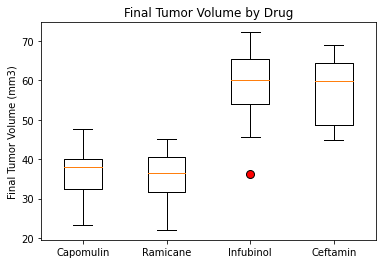

In [16]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
flierprops = dict(marker='o', markerfacecolor='r', markersize=8, markeredgecolor='black')

# Plot boxplot
plt.boxplot(drug_values, flierprops=flierprops)

# Add title and labels to boxplot
plt.title('Final Tumor Volume by Drug')
plt.ylabel('Final Tumor Volume (mm3)')
plt.xticks([1, 2, 3, 4], ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])

plt.show()

## Line and Scatter Plots

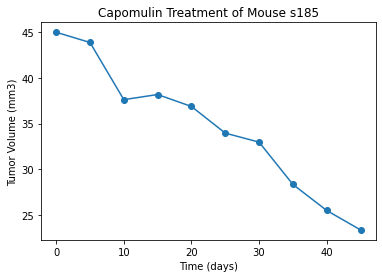

In [17]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
# Identify data points of a mouse treated with Capomulin
mouse = data_df.loc[data_df['Mouse ID'] == 's185']

# Plot a line chart with the time values on the x-axis and the tumor volume values on the y-axis
# marker = 'o' adds circles on each data point for visibility
plt.plot(mouse['Timepoint'], mouse['Tumor Volume (mm3)'], marker = 'o')

# Add labels and title to plot
plt.xlabel("Time (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment of Mouse s185")

# Display plot
plt.show()

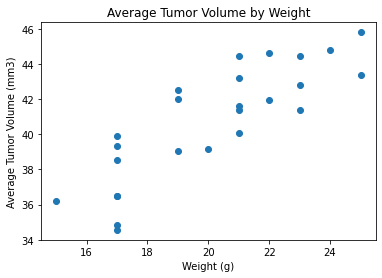

In [18]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
# Isolate cases that only use the Capomulin regimen
capomulin_df = data_df.loc[data_df['Drug Regimen'] == 'Capomulin']

# Find average tumor volume for each mouse

avg_vol_df = pd.DataFrame(capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().sort_values()).reset_index().rename(columns={'Tumor Volume (mm3)': 'avg_tumor_vol'})

# Merge average tumor volume onto data_df and drop duplicates
avg_vol_df = pd.merge(capomulin_df, avg_vol_df, on='Mouse ID')
final_avg_vol_df = avg_vol_df[['Weight (g)', 'avg_tumor_vol']].drop_duplicates()
final_avg_vol_df

x = final_avg_vol_df['Weight (g)']
y = final_avg_vol_df['avg_tumor_vol']

# Create a scatter plot based on new dataframe above with circle markers and listed colors
plt.scatter(x, y)

# Add labels and title to plot
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title('Average Tumor Volume by Weight')
# Display plot
plt.show()

## Correlation and Regression

The correlation between weight and average tumor volume
on the Capomulin regimen is 0.84.


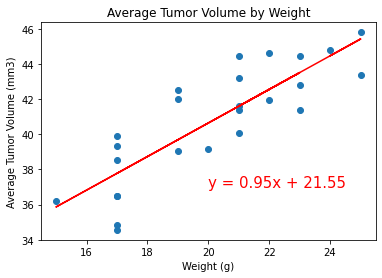

In [19]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
# Duplicate code for scatter plot from above:

capomulin_df = data_df.loc[data_df['Drug Regimen'] == 'Capomulin']
avg_vol_df = pd.DataFrame(capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().sort_values()).reset_index().rename(columns={'Tumor Volume (mm3)': 'avg_tumor_vol'})
avg_vol_df = pd.merge(capomulin_df, avg_vol_df, on='Mouse ID')
final_avg_vol_df = avg_vol_df[['Weight (g)', 'avg_tumor_vol']].drop_duplicates()
final_avg_vol_df
x = final_avg_vol_df['Weight (g)']
y = final_avg_vol_df['avg_tumor_vol']

# Calculate the correlation coefficient between mouse weight and average tumor volume
correlation = st.pearsonr(x,y)

# Print the answer to above calculation
print(f"""The correlation between weight and average tumor volume
on the Capomulin regimen is {round(correlation[0],2)}.""")

# Calculate linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot linear regression on top of scatter plot
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")

# Annotate linear regression
plt.annotate(line_eq,(20,37),fontsize=15,color="red")

# Add labels and title to plot
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title('Average Tumor Volume by Weight')
plt.show()